<a href="https://colab.research.google.com/github/metaperson1/metaperson1/blob/main/Titanic_survivors_predictions_Class_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Be the hero of the day by predicting the survival of Titanic passengers

Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. 

**In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**
GoodLuck!!!

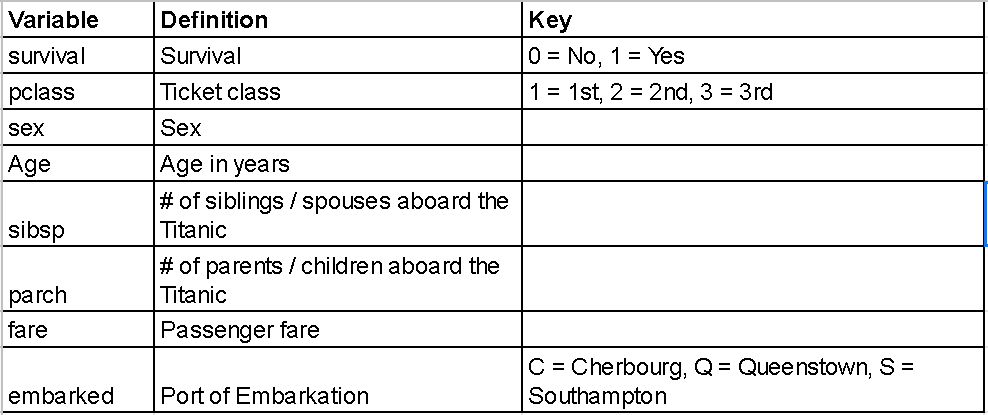

#### Previous notebooks used in this class can be accessed below:

1. [Linear Regression](https://colab.research.google.com/drive/1FFhkwU6gplsnlhoqkCzkkSD5fF3nsFc0?usp=sharing)
2. [Classification](https://bit.ly/AIECOLAB2) 

### More Resources:
1. Exploratory Data Analysis, Feature Engineering and Modelling using Supermarket Sales Data.
Part 1. By Rising Odegua https://towardsdatascience.com/exploratory-data-analysis-featureengineering-and-modelling-using-supermarket-sales-data-part-1-228140f89298
2. A Practical Guide to Feature Engineering in Python By Rising Odegua https://heartbeat.fritz.ai/apractical-guide-to-feature-engineering-in-python-8326e40747c8
3. train_test_split Vs StratifiedShuffleSplit - Brain John By Brain John
https://medium.com/@411.codebrain/train-test-split-vs-stratifiedshufflesplit-374c3dbdcc36
4. Introduction to Exploratory Data Analysis (EDA) - Code Heroku https://medium.com/codeheroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
5. Data Preprocessing for Machine Learning - Data-Driven Investor
https://medium.com/datadriveninvestor/data-preprocessing-for-machine-learning-188e9eef1d2c
6. Processing Data To Improve Machine Learning Models Accuracy
https://medium.com/fintechexplained/processing-data-to-improve-machine-learning-modelsaccuracy-de17c655dc8e
7. How To Develop a Machine Learning Model From Scratch
https://towardsdatascience.com/machine-learning-general-process-8f1b510bd8af
8. All Machine Learning Models Explained in 6 Minutes
https://towardsdatascience.com/all-machine-learning-models-explained-in-6-minutes-9fe30ff6776a
9. 7 Ways to Improve your Predictive Models - Rants on Machine Learning
https://medium.com/rants-on-machine-learning/7-ways-to-improve-your-predictive-models-753705eba3d6
10. 3 ways to improve your Machine Learning results without more data https://towardsdatascience.com/3-ways-to-improve-your-machine-learning-results-without-more-data-f2f0fe78976e

In [159]:
# For running pandas_profiling
#! pip install pandas==0.25.3
#pip install numpy==1.16.5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [160]:
url = 'https://drive.google.com/file/d/1BNrbPshNvrNHiTe1o-Cp1gpJKY-chv5Z/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

titanic = pd.read_csv(url)

In [161]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [162]:
#Dropping User ID column 
titanic.drop( ["SibSp", "Parch", "Embarked"], axis= "columns", inplace=True)

In [163]:
titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,26.0,23.4500
889,1,1,male,26.0,30.0000


In [164]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [165]:
ProfileReport(titanic)

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,891
Total Missing (%),0.0%
Total size in memory,34.9 KiB
Average record size in memory,40.1 B
Numeric,3
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


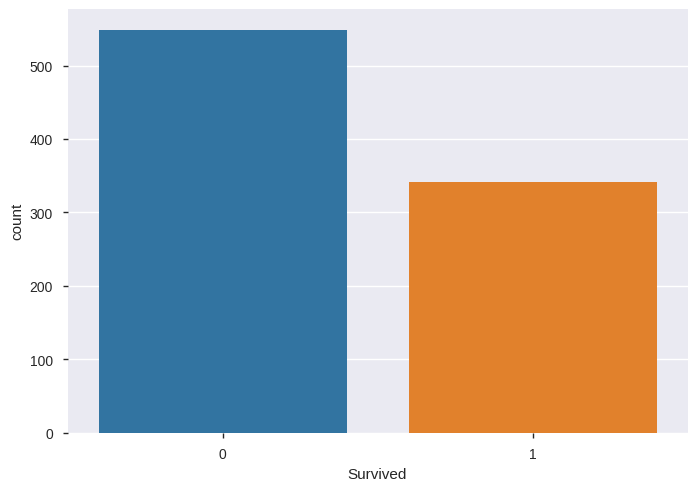

In [166]:
sns.countplot(x = "Survived", data = titanic)

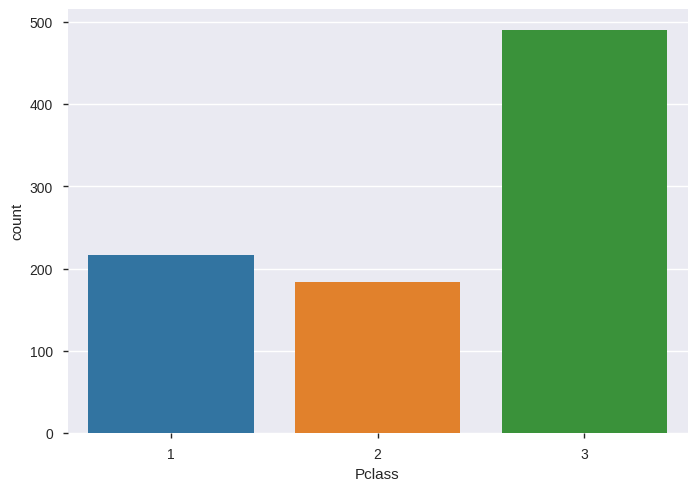

In [167]:
sns.countplot(x = "Pclass", data = titanic)

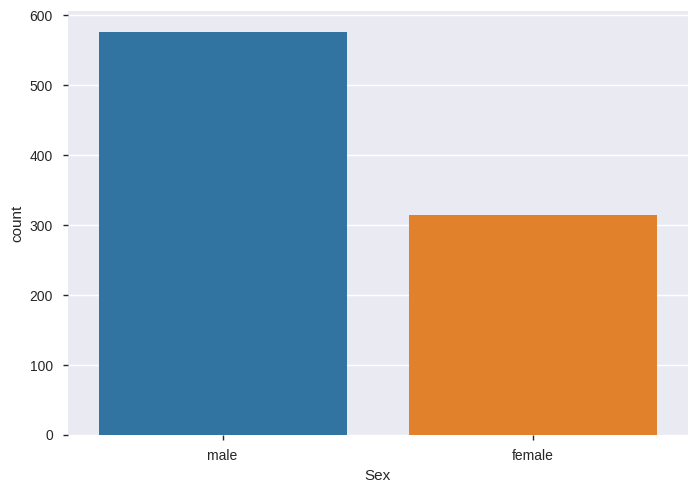

In [168]:
sns.countplot(x = "Sex", data = titanic)

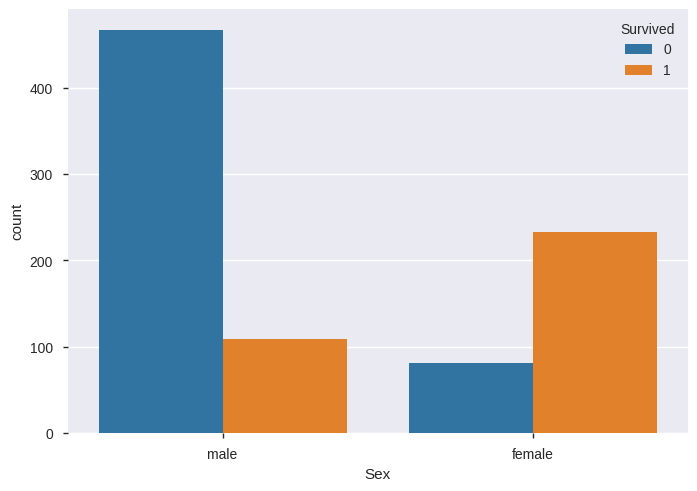

In [169]:
sns.countplot(x = "Sex", hue = "Survived", data = titanic)

### **MODEL BUILDING**

In [170]:
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data

Preparing the Data for modeling(Separating features and the label from the data)
Now is the time to build machine learning models for the task of predicting who survives or not. Therefore, we shall separate the set of features (X) from the label (Y).

In [171]:
X = titanic.drop(["Survived"], axis= "columns") # droping the label variable (Purchased) from the data
y = titanic["Survived"]

In [172]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [173]:
pd.get_dummies(titanic[ "Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [174]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [175]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
dtypes: float64(2), int64(1), uint8(2)
memory usage: 22.7 KB


Split the data into training and test set


As discussed in A, We will split our dataset (Features (X) and Label (Y)) into training and test data by using train_test_split() function from the sklearn. The training set will be 75% while the test set will be 25%. The random_state that is set to 42 arbitrarily.

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [177]:
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [178]:
logistic_prediction = logisticmodel.predict(X_test)

In [179]:
metrics.accuracy_score(y_test, logistic_prediction)

0.7757847533632287

In [180]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

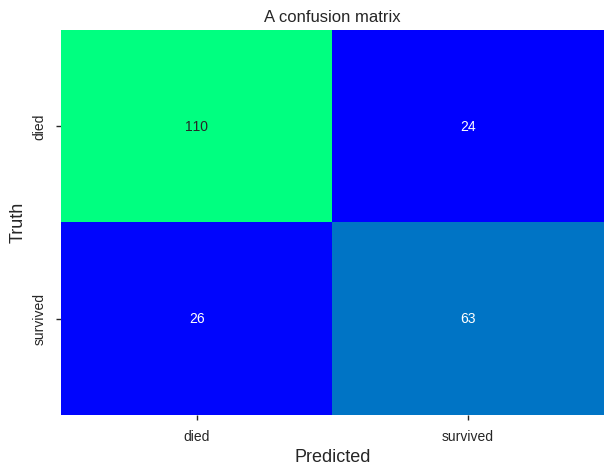

In [181]:
ConfusionMatrix(y_test, logistic_prediction, label= ["died", "survived"])

In [182]:
print(metrics.classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       134
           1       0.72      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [183]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [184]:
rf_prediction = randomforestmodel.predict(X_test)
metrics.accuracy_score(y_test, rf_prediction)

0.7757847533632287

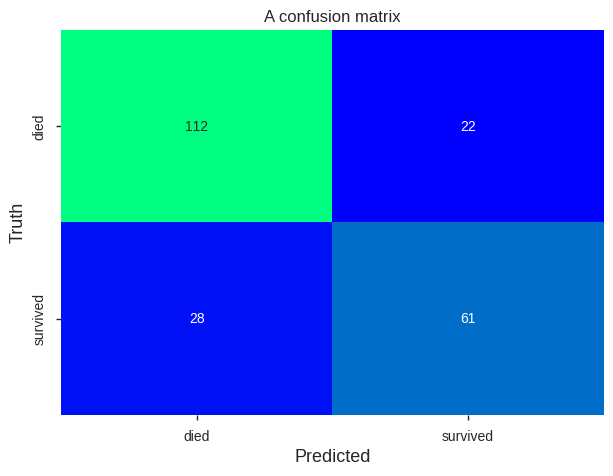

In [185]:
ConfusionMatrix(y_test, rf_prediction, label= ["died", "survived"])

In [218]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier(n_estimators= 50)
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [219]:
rf_prediction = randomforestmodel.predict(X_test)

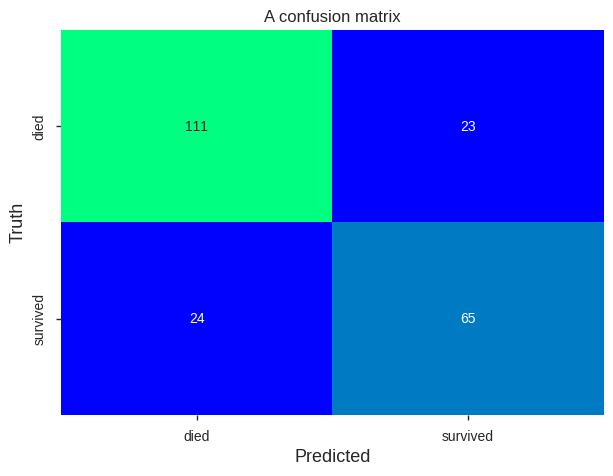

In [220]:
ConfusionMatrix(y_test, rf_prediction, label= ["died", "survived"])

In [221]:
print(metrics.classification_report(y_test, rf_prediction))


              precision    recall  f1-score   support

           0       0.82      0.83      0.83       134
           1       0.74      0.73      0.73        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [222]:
print('Parameters currently in use:\n')
mod_details = randomforestmodel.get_params()
for i in mod_details:
  print(i," :", mod_details[i])

Parameters currently in use:

bootstrap  : True
ccp_alpha  : 0.0
class_weight  : None
criterion  : gini
max_depth  : None
max_features  : auto
max_leaf_nodes  : None
max_samples  : None
min_impurity_decrease  : 0.0
min_samples_leaf  : 1
min_samples_split  : 2
min_weight_fraction_leaf  : 0.0
n_estimators  : 50
n_jobs  : None
oob_score  : False
random_state  : None
verbose  : 0
warm_start  : False


In [228]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10, 15, 20, 25, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 6, 8, 10, 12]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

for i in random_grid:
  print(i," :", random_grid[i])

n_estimators  : [20, 51, 82, 113, 144, 175, 206, 237, 268, 300]
max_features  : ['auto', 'sqrt']
max_depth  : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None]
min_samples_split  : [10, 15, 20, 25, 30]
min_samples_leaf  : [4, 6, 8, 10, 12]
bootstrap  : [True, False]


In [229]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=7, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8, 10, 12],
                                        'min_samples_split': [10, 15, 20, 25,
                                                              30],
                                        'n_estimators': [20, 51, 82, 113, 144,
                                                         175, 206, 237, 268,
                                                         300]},
                   random_state=7, verbose=2)

In [230]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 113}

In [231]:
from sklearn.metrics import accuracy_score

base_model = RandomForestClassifier(random_state= 7)
base_model.fit(X_train, y_train)
bm_predictions = base_model.predict(X_test)
base_accuracy = metrics.accuracy_score(y_test, bm_predictions)
print("Base model Accuracy:", base_accuracy)

best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)
best_predictions = best_random.predict(X_test)
best_accuracy = metrics.accuracy_score(y_test, best_predictions)
print("Best model Accuracy:", best_accuracy)

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Base model Accuracy: 0.7847533632286996
Best model Accuracy: 0.820627802690583
Improvement of 4.57%.


In [232]:
from sklearn.metrics import f1_score
f1_score(y_test, best_predictions)


0.7590361445783134